## EDA of given dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1 = pd.read_csv('Customers.csv')
df2 = pd.read_csv('Products.csv')
df3 = pd.read_csv('Transactions.csv')

In [8]:
df1.head()
#df1.info()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
df2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [10]:
df3.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [11]:
df2.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [13]:
df1['Region'].unique()



array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [14]:
df2['ProductName'].unique()

array(['ActiveWear Biography', 'ActiveWear Smartwatch',
       'ComfortLiving Biography', 'BookWorld Rug', 'TechPro T-Shirt',
       'ActiveWear Rug', 'SoundWave Cookbook',
       'BookWorld Bluetooth Speaker', 'BookWorld Wall Art',
       'ComfortLiving Smartwatch', 'SoundWave Desk Lamp',
       'ComfortLiving Headphones', 'BookWorld Smartwatch',
       'ActiveWear Jacket', 'HomeSense Headphones',
       'ActiveWear Running Shoes', 'ActiveWear Textbook',
       'ComfortLiving Mystery Book', 'ComfortLiving Sweater',
       'SoundWave Rug', 'HomeSense Wall Art', 'ActiveWear Cookware Set',
       'SoundWave Bluetooth Speaker', 'SoundWave Headphones',
       'HomeSense Desk Lamp', 'TechPro Headphones', 'ActiveWear Cookbook',
       'BookWorld Cookbook', 'HomeSense T-Shirt', 'ActiveWear T-Shirt',
       'BookWorld Jacket', 'SoundWave Smartwatch', 'TechPro Vase',
       'TechPro Smartwatch', 'SoundWave Mystery Book',
       'ComfortLiving Smartphone', 'ActiveWear Headphones',
       'SoundW

In [17]:
#df1.isnull().sum()
#df2.isnull().sum()
df3.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [20]:
## Duplicate records
df1[df1.duplicated()] #0 found
df2[df2.duplicated()] #0 Found
df3[df3.duplicated()] #0 found

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [22]:
## Correlation
#df1.corr()

## Univariate Analysis


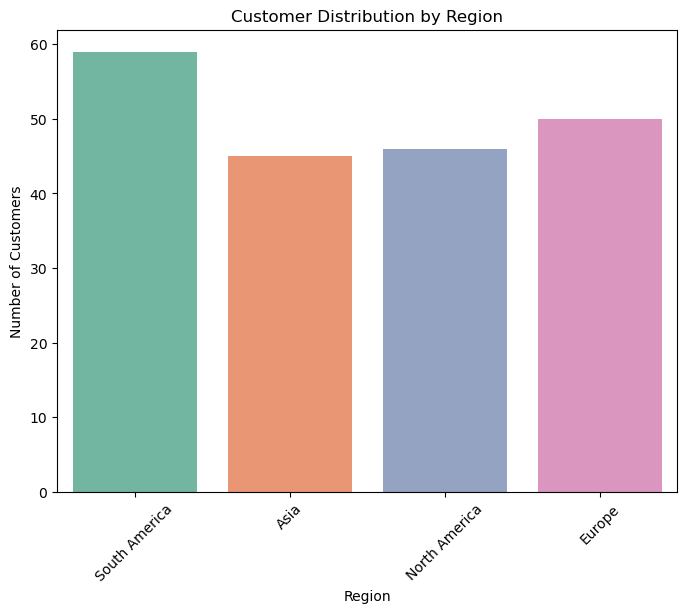

In [25]:
# Customer region distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

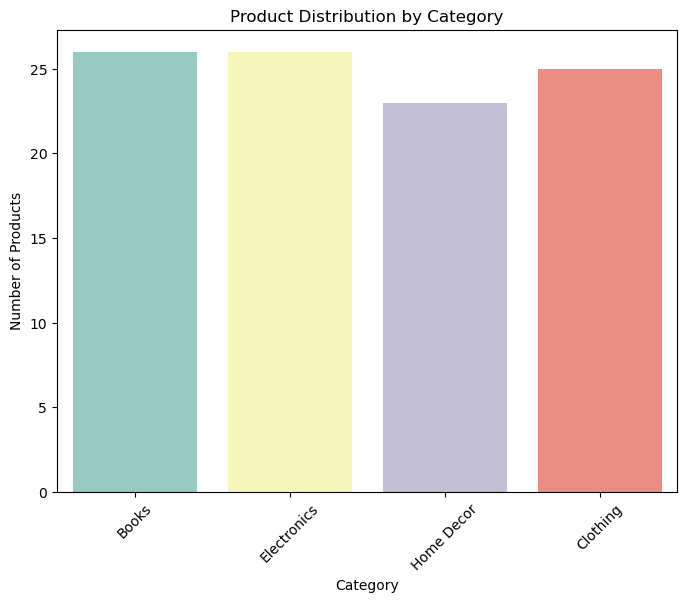

In [26]:
# Product category distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='Category', palette='Set3')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

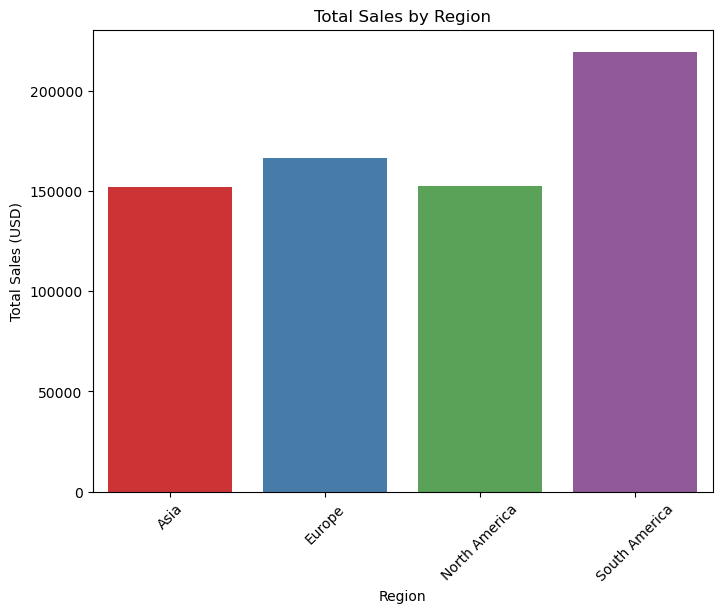

In [39]:
# Sales by region
sales_by_region = df3.merge(df1, on='CustomerID')
sales_by_region = sales_by_region.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_region, x='Region', y='TotalValue', palette='Set1')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


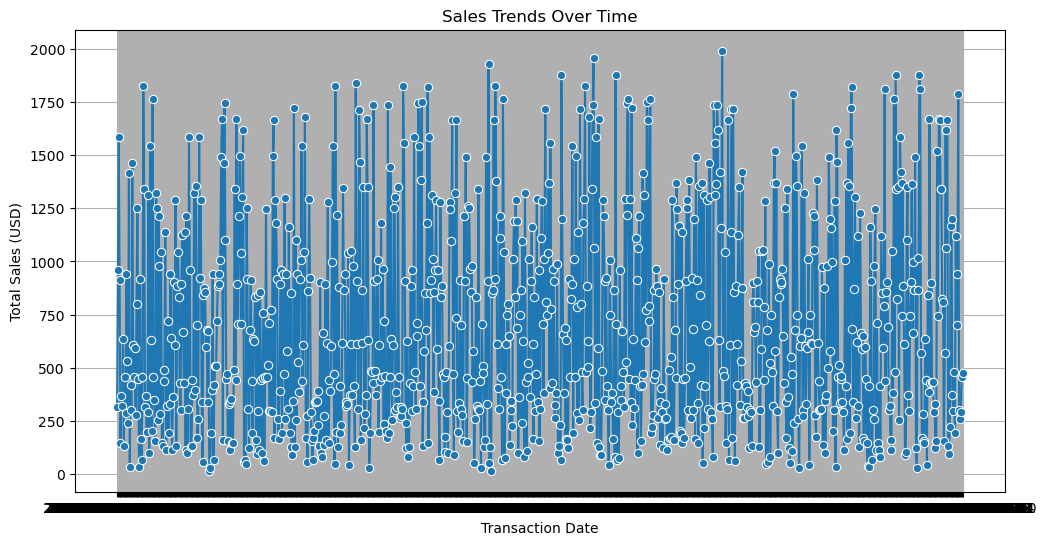

In [29]:
# Sales trends over time
sales_by_date = df3.groupby('TransactionDate')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_date, x='TransactionDate', y='TotalValue', marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

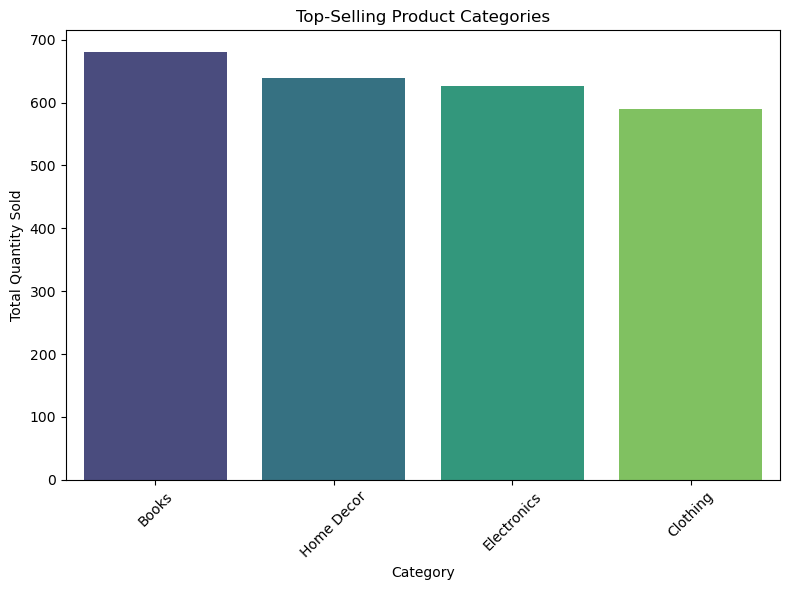

In [41]:
transactions_products = df3.merge(df2, on='ProductID')

category_sales = transactions_products.groupby('Category')['Quantity'].sum().reset_index()

category_sales = category_sales.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=category_sales, x='Category', y='Quantity', palette='viridis')
plt.title('Top-Selling Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


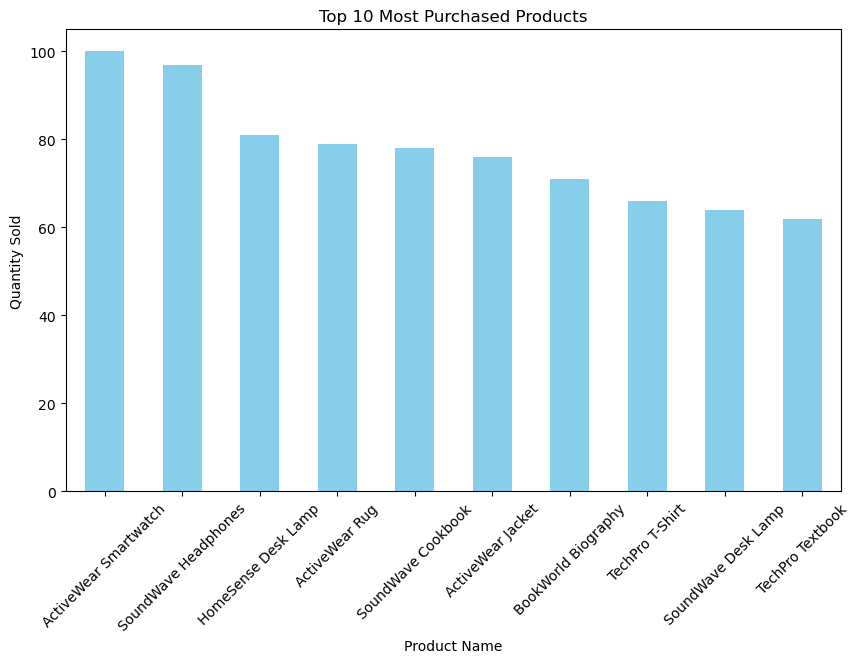

In [40]:
# Most purchased products
top_products = df3.merge(df2, on='ProductID')
top_products = top_products.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


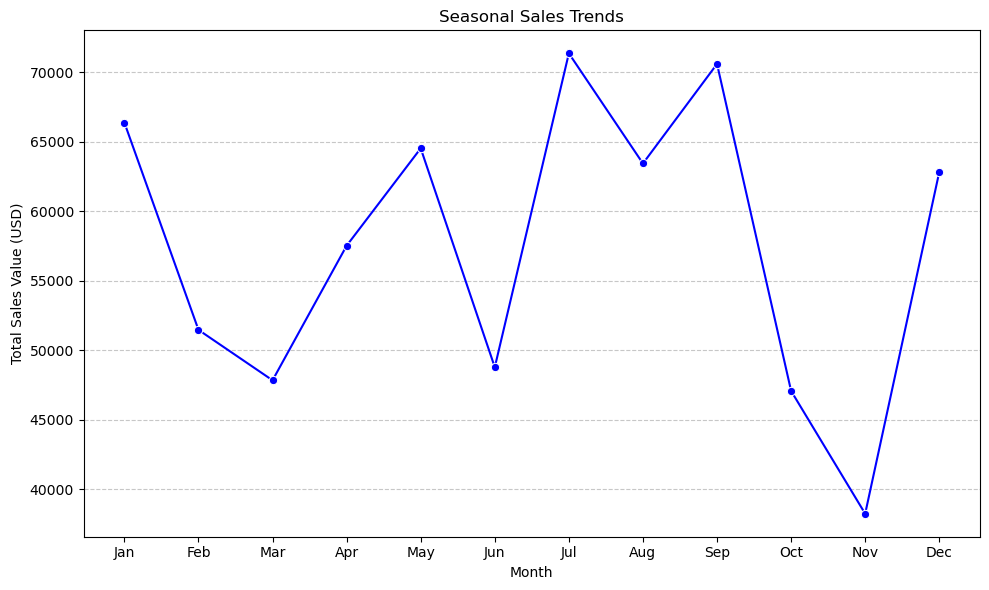

In [42]:
df3['TransactionDate'] = pd.to_datetime(df3['TransactionDate'])

df3['Month'] = df3['TransactionDate'].dt.month
df3['Year'] = df3['TransactionDate'].dt.year

monthly_sales = df3.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o', color='blue')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


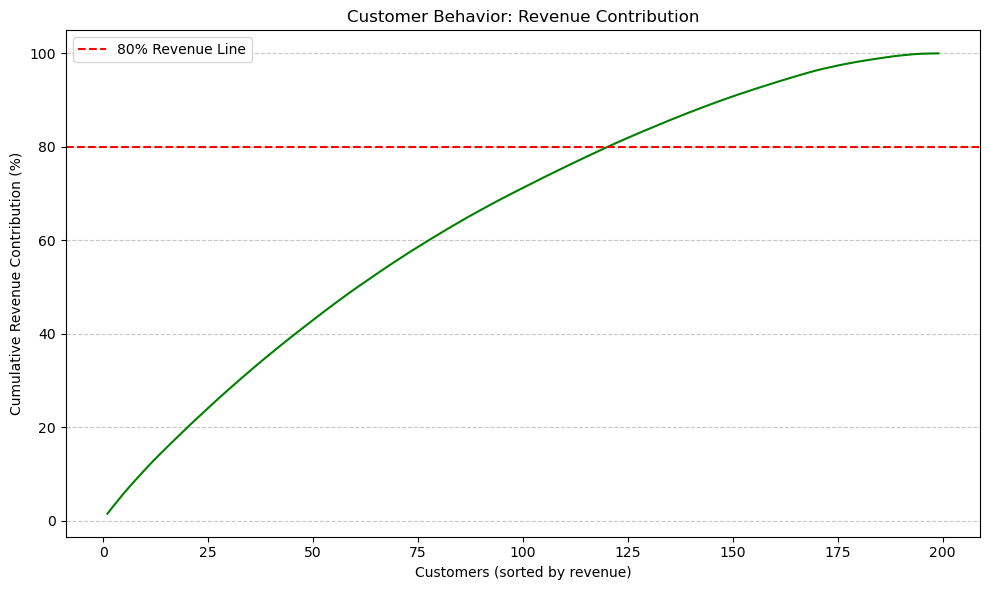

In [43]:
customer_revenue = df3.groupby('CustomerID')['TotalValue'].sum().reset_index()

customer_revenue = customer_revenue.sort_values(by='TotalValue', ascending=False)

customer_revenue['CumulativeRevenue'] = customer_revenue['TotalValue'].cumsum()
customer_revenue['CumulativePercentage'] = (customer_revenue['CumulativeRevenue'] / customer_revenue['TotalValue'].sum()) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=customer_revenue, x=range(1, len(customer_revenue) + 1), y='CumulativePercentage', color='green')
plt.axhline(80, color='red', linestyle='--', label='80% Revenue Line')
plt.title('Customer Behavior: Revenue Contribution')
plt.xlabel('Customers (sorted by revenue)')
plt.ylabel('Cumulative Revenue Contribution (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


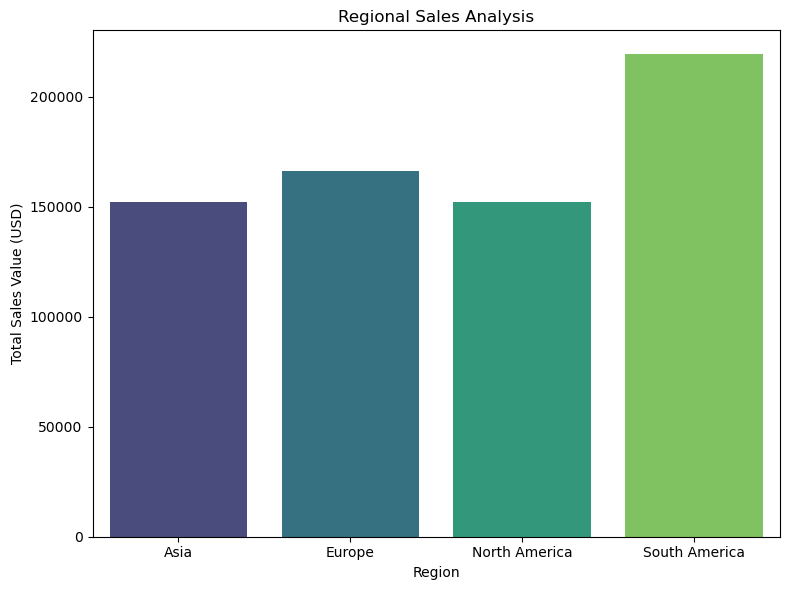

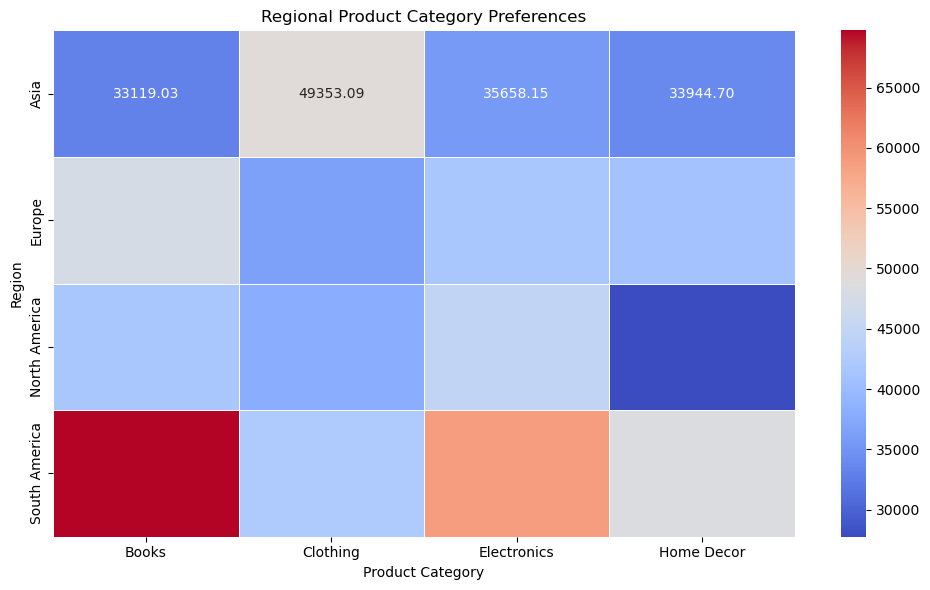

In [52]:
customer_transactions = pd.merge(df3, df1, on='CustomerID')

region_sales = customer_transactions.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='viridis')
plt.title('Regional Sales Analysis')
plt.xlabel('Region')
plt.ylabel('Total Sales Value (USD)')
plt.tight_layout()
plt.show()

region_category = pd.merge(customer_transactions, df2, on='ProductID')
region_category_sales = region_category.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(region_category_sales, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Regional Product Category Preferences')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


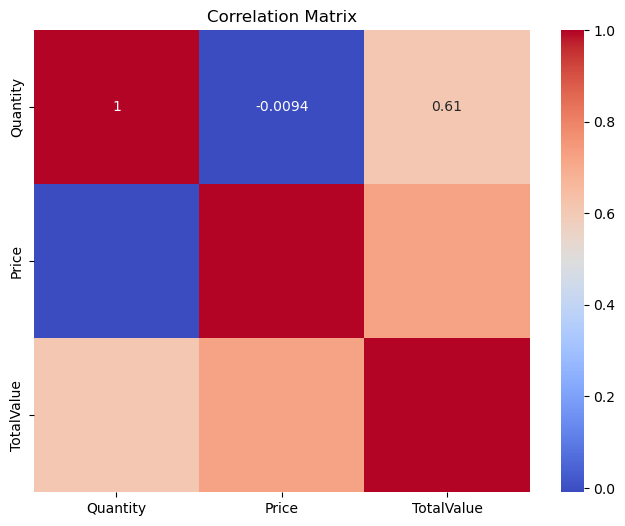

In [31]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df3[['Quantity', 'Price', 'TotalValue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


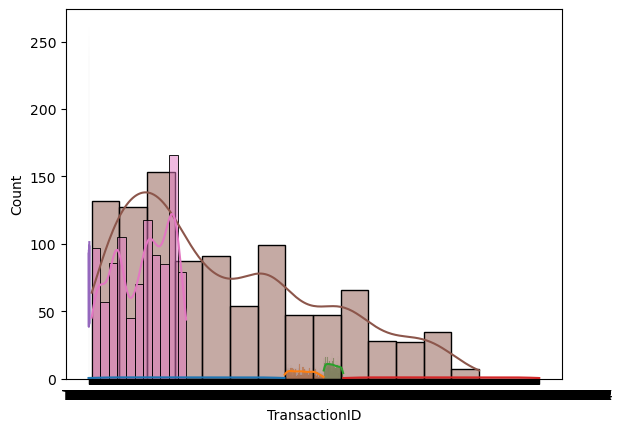

In [35]:
for column in df3.columns:
    sns.histplot(df3[column],kde=True)

d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

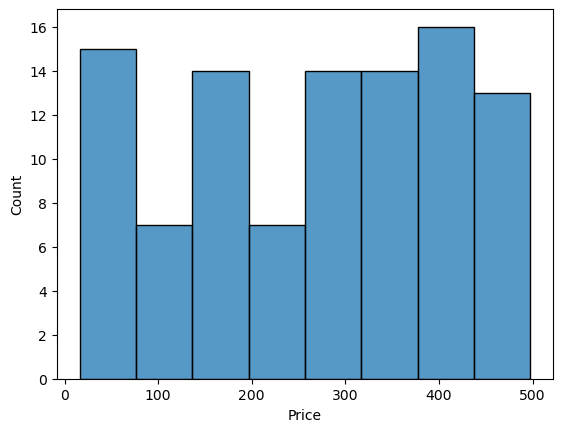

In [37]:
sns.histplot(df2['Price'])